In [2]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import os
import zipfile
import shutil
from glob import glob

import tensorflow.keras.utils as utils

from tensorflow.keras.applications import Xception, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'car_damage_type')
TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')
TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')

In [5]:
#### Colab

from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
print('mount is completed')

data_path = "/content/gdrive/MyDrive/"

shutil.copy(os.path.join('/content/gdrive/My Drive/FINAL PROJECT/', 'car_damage_type.zip'), ROOT_DIR)

if os.path.exists(DATA_ROOT_DIR):
    shutil.rmtree(DATA_ROOT_DIR)

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'car_damage_type.zip'), 'r') as target_file:
    target_file.extractall(DATA_ROOT_DIR)

Mounted at /content/gdrive
mount is completed


In [6]:
label_name_list = os.listdir(DATA_ROOT_DIR)


for i in range(len(label_name_list)):

    path = os.path.join(DATA_ROOT_DIR, os.listdir(DATA_ROOT_DIR)[i])
    print(os.listdir(DATA_ROOT_DIR)[i], len(os.listdir(path)))

car_damage_type 3
__MACOSX 1


# test dir 및 하위 디렉토리 생성

In [ ]:
# if not os.path.exists(TEST_DATA_ROOT_DIR):
#     os.mkdir(TEST_DATA_ROOT_DIR)
#     print(TEST_DATA_ROOT_DIR + ' is created')
# else:
#     print(TEST_DATA_ROOT_DIR + ' is already extists')

# for label_name in label_name_list:
#     if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, label_name)):
#         os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))
#         print(os.path.join(TEST_DATA_ROOT_DIR, label_name) + ' is created')
#     else:
#         print(os.path.join(TEST_DATA_ROOT_DIR, label_name) + ' is already extists')


## 파일 개수 확인, 셔플 이동

In [ ]:

# MOVE_RATIO = 0.2
# move_num = 0

# for label_name in label_name_list:
#     src = os.path.join(DATA_ROOT_DIR, label_name)
#     dst = os.path.join(TEST_DATA_ROOT_DIR, label_name)

#     train_data_file_list = os.listdir(src)

#     print("-----------------------------------------")
#     print("total [%s] data file nums => [%s]"%(label_name, len(train_data_file_list)))

#     np.random.shuffle(train_data_file_list)
#     print("train data shuffle is done!!!")

#     split_num = int(MOVE_RATIO * len(train_data_file_list))
#     print("split nums =>", split_num)

#     test_data_file_list = train_data_file_list[0:split_num]

#     move_nums = 0
#     for test_data_file in test_data_file_list:
#         shutil.move(os.path.join(src, test_data_file),
#                    os.path.join(dst, test_data_file))

#         move_num = move_num + 1
#     print("total mov num =>", move_num)
#     print("-----------------------------------------")

# 폴더 train으로 안묶어서 묶어주기

In [ ]:
# # for_train_list = os.listdir(DATA_ROOT_DIR)

# train_list = ['Separated', 'Breakaged', 'Crush', 'Scratched']
# train_list

In [ ]:
# if not os.path.exists(TRAIN_DATA_ROOT_DIR):
#     os.mkdir(TRAIN_DATA_ROOT_DIR)
#     print(TRAIN_DATA_ROOT_DIR + ' is created')
# else:
#     print(TRAIN_DATA_ROOT_DIR + ' is already extists')

# for label_name in train_list:
#     if not os.path.exists(os.path.join(TRAIN_DATA_ROOT_DIR, label_name)):
#         os.mkdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))
#         print(os.path.join(TRAIN_DATA_ROOT_DIR, label_name) + ' is created')
#     else:
#         print(os.path.join(TRAIN_DATA_ROOT_DIR, label_name) + ' is already extists')

In [ ]:
print(TRAIN_DATA_ROOT_DIR)
print(DATA_ROOT_DIR)

In [ ]:
# for label_name in train_list:
#     shutil.move(os.path.join(DATA_ROOT_DIR, label_name), os.path.join(TRAIN_DATA_ROOT_DIR, label_name))

# 경로 다시 보고 잡기

In [9]:
ROOT_DIR = '/content'
# /content/car_damage_type/car_damage_type
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'car_damage_type/car_damage_type')
TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train')
TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test')
TRAIN_DATA_ROOT_DIR

'/content/car_damage_type/car_damage_type/train'

## ImageDataGenerator를 이용하여 데이터 불러오기

In [10]:
IMAGE_SIZE = 224

train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_data_gen = ImageDataGenerator(rescale=1./255)



train_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True,
                                                subset='training')

val_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True,
                                                subset='validation')

test_generator = test_data_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode = 'sparse', shuffle = True)

Found 129349 images belonging to 4 classes.
Found 32335 images belonging to 4 classes.
Found 40418 images belonging to 4 classes.


In [11]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'breakeage': 0, 'crush': 1, 'scratch': 2, 'separate': 3}
4


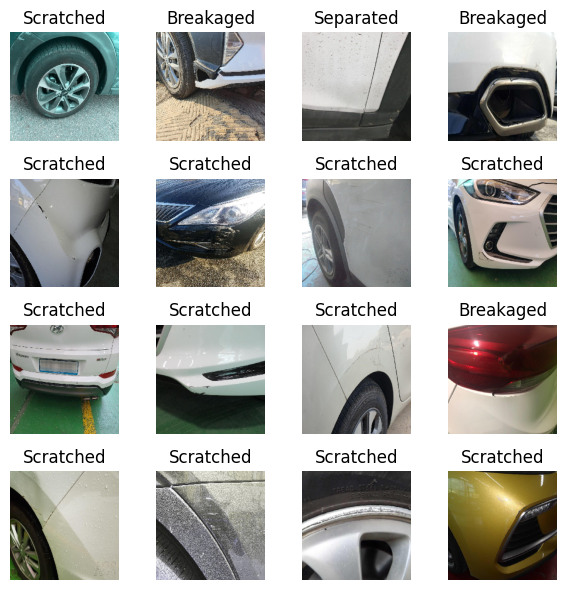

In [12]:
### 16 장의 이미지 확인


img, label = train_generator.next()
img = img[:16]
label = label[:16]

class_name = {0: 'Breakaged', 1: 'Crush', 2: 'Scratched', 3: 'Separated'}

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(4, 4, i+1)
    plt.title(class_name[int(label[i])])
    plt.imshow(img[i])
    plt.axis('off')
plt.tight_layout()


# 모델링 테스트

## (1) CCP CCP F D D

In [13]:
model = Sequential()

### 1st layer
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

### 2nd layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

# F

model.add(Flatten())

# hidden layer

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.6))

model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [15]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[tf_stop]) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/30
4043/4043 [==============================] - 2005s 492ms/step - loss: 0.6065 - accuracy: 0.8370 - val_loss: 0.5572 - val_accuracy: 0.8373
Epoch 2/30
4043/4043 [==============================] - 1985s 491ms/step - loss: 0.5574 - accuracy: 0.8373 - val_loss: 0.5445 - val_accuracy: 0.8373
Epoch 3/30
4043/4043 [==============================] - 1970s 487ms/step - loss: 0.5310 - accuracy: 0.8373 - val_loss: 0.5276 - val_accuracy: 0.8373
Epoch 4/30
4043/4043 [==============================] - 1999s 494ms/step - loss: 0.5049 - accuracy: 0.8386 - val_loss: 0.5147 - val_accuracy: 0.8384
Epoch 5/30
4043/4043 [==============================] - 1964s 486ms/step - loss: 0.4738 - accuracy: 0.8435 - val_loss: 0.5064 - val_accuracy: 0.8435
Epoch 6/30
2617/4043 [==================>...........] - ETA: 9:20 - loss: 0.4446 - accuracy: 0.8505

KeyboardInterrupt: ignored

NameError: ignored

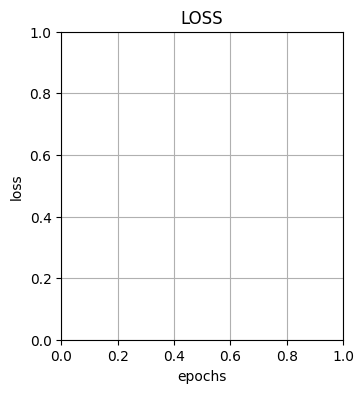

In [16]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["accuracy"], label="train_acc")
plt.plot(result.history["val_accuracy"], label="validation_acc")
plt.legend(loc="best")
plt.show()

# 모델링 테스트

## (1) CCP CCP F D D

In [ ]:
model = Sequential()

### 1st layer
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

### 2nd layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=64,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2))) #, padding="same"
model.add(Dropout(0.25))

# F

model.add(Flatten())

# hidden layer

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.6))

model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=0.01),
             metrics=['accuracy'])

tf_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

In [ ]:
from datetime import datetime

start_time = datetime.now()

result = model.fit(train_generator, epochs=5, validation_data=val_generator) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/5
1377/1377 [==============================] - 608s 440ms/step - loss: 1.6426 - accuracy: 0.2897 - val_loss: 1.3409 - val_accuracy: 0.2907
Epoch 2/5
1377/1377 [==============================] - 545s 396ms/step - loss: 1.3414 - accuracy: 0.2901 - val_loss: 1.3408 - val_accuracy: 0.2907
Epoch 3/5
1377/1377 [==============================] - 549s 398ms/step - loss: 1.3413 - accuracy: 0.2918 - val_loss: 1.3407 - val_accuracy: 0.2907
Epoch 4/5
1377/1377 [==============================] - 551s 400ms/step - loss: 1.3416 - accuracy: 0.2840 - val_loss: 1.3407 - val_accuracy: 0.2907
Epoch 5/5
1377/1377 [==============================] - 549s 399ms/step - loss: 1.3416 - accuracy: 0.2872 - val_loss: 1.3413 - val_accuracy: 0.2907
Run time : 0:47:09.864754


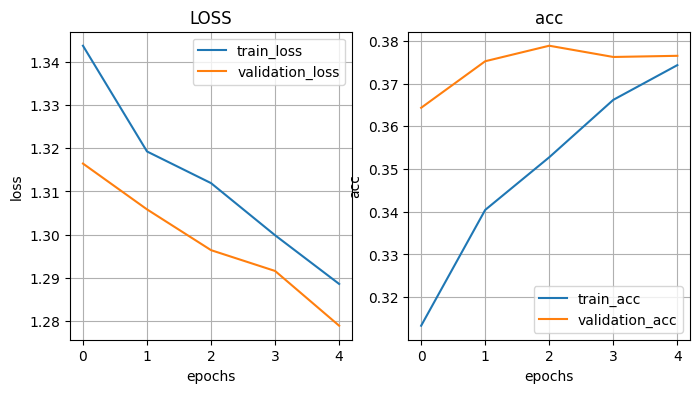

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["accuracy"], label="train_acc")
plt.plot(result.history["val_accuracy"], label="validation_acc")
plt.legend(loc="best")
plt.show()